# Supervised Learning—How to do a Classification Tree in Python

## Case study: determining the variety of raisin

Automated food detection is useful in food production, food safety, and dietary monitoring. 

The process has two steps:

1. Convert images of food into numeric features, like dimensions, shape, color.
2. Run a classification model on those features.

This raisin dataset, sourced from the [UCI Machine Learning Archive](https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset) contains the output of step 1 for varieties of Turkish raisin.

We'll need **pandas** for importing the data and doing some manipulation, then **scikit-learn** for modeling, and **matplotlib** for plotting.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

The dataset is in a CSV file named `"raisins.csv"`.

In [ ]:
raisins = pd.read_csv("raisins.csv")
raisins

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Variety
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


## Data dictionary

Each row represents one raisin. Some columns are easier to interpret if you think of the raisin as being an ellipse.

![](ellipse.png)

- **Area**: Area of the raisin in pixels. Approximately `pi * a * b`.
- **MajorAxisLength**: The length of the longest diameter of the raisin in pixels. Equal to `2 * b`.
- **MinorAxisLength**: The length of the shortest diameter of the raisin in pixels. Equal to `2 * a`.
- **Eccentricity**: How close to circular is the raisin? Equal to `sqrt(1 - (2 * a) ^ 2 / (2 * b) ** 2)`.
- **ConvexArea**: Area of smallest convex shape around the raisin in pixel. Approximately `pi * a * b`, and slightly more than Area.
- **Extent**: Fraction of a rectangle drawn around the raisin that contains the raisin image.
- **Perimeter**: Perimeter of the raisin in pixels. Approximately `pi * (3 * (a + b) - sqrt((3 * a + b) * (a + 3 * b)))`
- **Variety**: The variety of raisin. Either **Kecimen** (sour black grape) or **Besni** (pale grape).

## Splitting into response and explanatory columns

The response column is `"Variety"`. The explanatory (input) columns are all the other columns.

In [ ]:
response = raisins["Variety"]
explanatory = raisins.drop(columns="Variety")

## Splitting into training and testing sets

The explanatory and response datasets need to be split into training and testing sets. 

Here we'll use [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with the default arguments.

In [ ]:
explanatory_train, explanatory_test, response_train, response_test = train_test_split(explanatory, response)

## Fitting the model to the training set

The data is now ready to model. The first modeling step is to create a [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) object.

In [ ]:
mdl = DecisionTreeClassifier(max_depth=3, min_samples_leaf=20)

Use the [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) method to fit the model to the training set.

In [ ]:
mdl.fit(explanatory_train, response_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20)

## Making predictions on the testing set

You can calculate the predicted response with the [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict) method.

In [ ]:
predicted_responses = mdl.predict(explanatory_test)
predicted_responses

array(['Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni',
       'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni',
       'Besni', 'Besni', 'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Kecimen', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Besni',
       'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Kecimen',
       'Besni', 'Besni', 'Besni', 'Kecimen', 'Kecimen', 'Besni', 'Besni',
       'Besni', 'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni',
       'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Ke

## Assessing model performance

There are four possible outcomes, depending on whether the actual response and the predicted response are true or false. The confusion matrix, created with [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) shows the counts of each case.

|                     |**predicted Besni** |**predicted Kecimen** |
|:--------------------|:-----------------|:----------------|
|**actual Besni** |correct           |false positive   |
|**actual Kecimen**  |false negative    |correct          |

In [ ]:
confusion_matrix(response_test, predicted_responses)

array([[108,  11],
       [ 13,  93]])

[`accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) provides a commonly used metric about the performance of the model. 

**Accuracy**: What fraction of the values were correctly predicted? (Sum of diagonal divided by sum of all values.)

In [ ]:
accuracy_score(response_test, predicted_responses)

NameError: name 'response_test' is not defined

Visualizing the tree helps to see how the decisions are made. Using [`plot_tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) is the simplest way to do this.

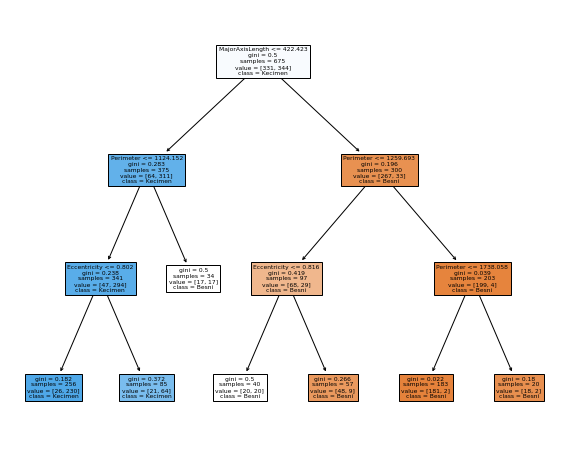

In [ ]:
plt.figure(figsize = (10, 8))
plot_tree(mdl, feature_names=explanatory.columns, class_names=["Besni", "Kecimen"], filled=True)
plt.show()